In [3]:
import tensorflow as tf

from keras.models import Sequential,load_model

from tensorflow.keras.layers import Dense,Input,Dropout,Flatten
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.utils import shuffle

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Southkorea.zip to Southkorea.zip


In [5]:
!unzip /content/Southkorea.zip

Archive:  /content/Southkorea.zip
  inflating: data/README.txt         
  inflating: data/test.csv           
  inflating: data/train.csv          


In [6]:
train_df=pd.read_csv("data/train.csv" )
train_df.head()

,subject,acc1_x,acc1_y,acc1_z,gyro1_x,gyro1_y,gyro1_z,acc2_x,acc2_y,acc2_z,label
0,3,-0.049573,0.051482,0.061498,0.357428,0.876525,-1.077288,0.951736,-0.303094,-0.133766,5
1,3,-0.085298,0.048648,0.083263,0.337020,0.840771,-1.329607,0.918129,-0.301953,-0.111281,5
2,3,-0.046568,0.057793,0.114970,0.320000,0.909147,-0.788201,0.958863,-0.288855,-0.078756,5
3,3,0.001564,0.068723,0.144465,0.308596,0.773221,-0.313850,1.008886,-0.274002,-0.048346,5
4,3,-0.026644,0.088834,0.188589,0.308176,0.691534,-0.457948,0.982454,-0.250003,-0.003217,5


In [7]:
train_df.shape

(528256, 11)

In [8]:
train_df.info

<bound method DataFrame.info of         subject    acc1_x    acc1_y  ...    acc2_y    acc2_z  label
0             3 -0.049573  0.051482  ... -0.303094 -0.133766      5
1             3 -0.085298  0.048648  ... -0.301953 -0.111281      5
2             3 -0.046568  0.057793  ... -0.288855 -0.078756      5
3             3  0.001564  0.068723  ... -0.274002 -0.048346      5
4             3 -0.026644  0.088834  ... -0.250003 -0.003217      5
...         ...       ...       ...  ...       ...       ...    ...
528251       29 -0.107620  0.070661  ... -0.153626 -0.107647      2
528252       29 -0.128435 -0.037570  ... -0.261862 -0.102736      2
528253       29 -0.076082 -0.120978  ... -0.345270 -0.059629      2
528254       29 -0.115918 -0.109133  ... -0.333423 -0.073032      2
528255       29 -0.099971 -0.021975  ... -0.246267 -0.083139      2

[528256 rows x 11 columns]>

In [9]:
test_df = pd.read_csv("data/test.csv")
test_df.head()

,subject,acc1_x,acc1_y,acc1_z,gyro1_x,gyro1_y,gyro1_z,acc2_x,acc2_y,acc2_z,label
0,2,0.011653,-0.029399,0.106826,0.437464,0.531349,0.136528,1.041216,-0.269796,0.023780,5
1,2,0.013109,-0.039729,0.152455,0.468264,0.721069,0.097622,1.041803,-0.280025,0.076293,5
2,2,0.011269,-0.052406,0.216846,0.498257,0.520328,0.083556,1.039086,-0.292663,0.147475,5
3,2,0.027831,-0.052106,0.202581,0.479396,0.372625,0.022861,1.054768,-0.292384,0.139906,5
4,2,0.002318,-0.045470,0.176010,0.389894,0.414541,-0.025939,1.028376,-0.285826,0.119934,5


In [10]:
test_df.info

<bound method DataFrame.info of         subject    acc1_x    acc1_y  ...    acc2_y    acc2_z  label
0             2  0.011653 -0.029399  ... -0.269796  0.023780      5
1             2  0.013109 -0.039729  ... -0.280025  0.076293      5
2             2  0.011269 -0.052406  ... -0.292663  0.147475      5
3             2  0.027831 -0.052106  ... -0.292384  0.139906      5
4             2  0.002318 -0.045470  ... -0.285826  0.119934      5
...         ...       ...       ...  ...       ...       ...    ...
263419       30  0.022358 -0.280075  ... -0.486260 -0.205803      2
263420       30 -0.024451 -0.248612  ... -0.453405 -0.180733      2
263421       30 -0.071907 -0.194322  ... -0.397775 -0.156105      2
263422       30 -0.142209 -0.147070  ... -0.349247 -0.122798      2
263423       30 -0.170999 -0.131399  ... -0.332372 -0.083572      2

[263424 rows x 11 columns]>

In [11]:
test_df.shape

(263424, 11)

In [12]:
train_df = shuffle(train_df)
test_df = shuffle(test_df)
train_df.to_csv("./data/train.csv", index = False)
test_df.to_csv("./data/test.csv", index = False)

In [13]:
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')


y_train = train_df['label']
X_train = train_df.drop(['label','subject'],axis=1)
y_test = test_df['label']
X_test = test_df.drop(['label', 'subject'],axis=1)

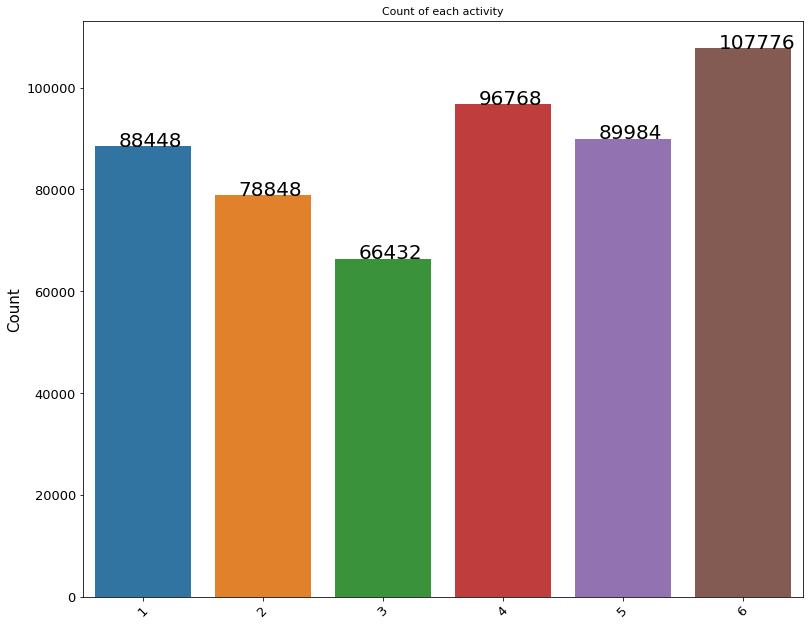

In [14]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Count of each activity", fontsize = 11)
plt.tick_params(labelsize = 10)
sns.countplot(x='label' , data = train_df)
for i in ax.patches:
    ax.text(x = i.get_x() + 0.2 , y = i.get_height() + 10, s = str(i.get_height()), fontsize=20)
plt.xlabel('')
plt.ylabel('Count',fontsize =15)
plt.tick_params(labelsize = 13)
plt.xticks(rotation = 45)
plt.show()

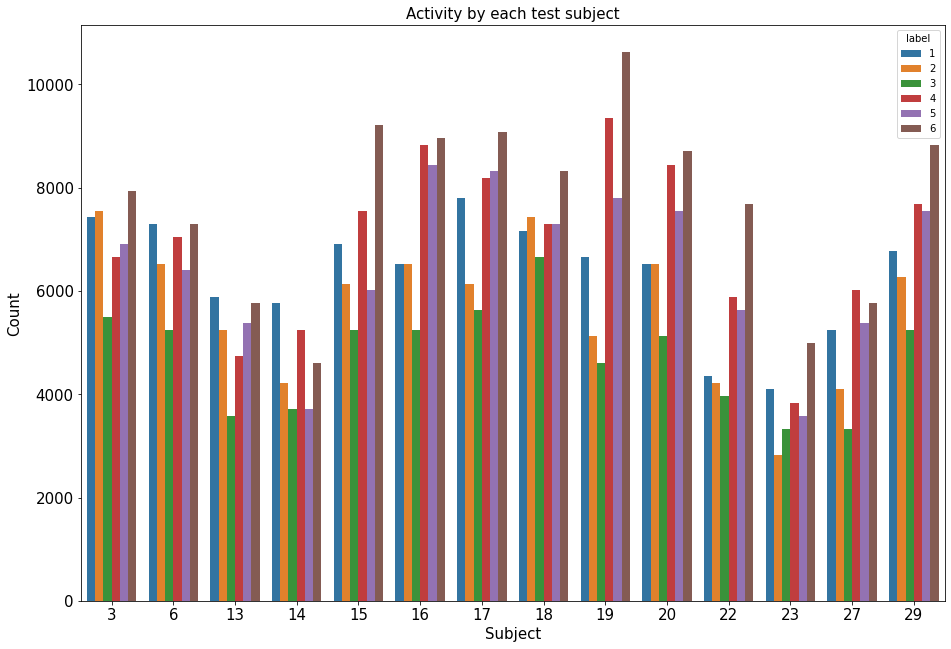

In [15]:
fig = plt.figure(figsize = (12, 8))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Activity by each test subject", fontsize = 15)
plt.tick_params(labelsize = 15)
sns.countplot(x = 'subject', hue = "label", data = train_df)
plt.xlabel("Subject", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.show()

In [16]:
# Variables-
epochs = 25
batch_size = 64
num_classes = 14
fig_size = (9,7)

In [17]:
# FUNCTIONS-
def PREPROCESS(X , y):
    scaler = MinMaxScaler()
    scaler.fit(X)
    X = scaler.transform(X)
    y = np.array(y)
    return X,y

def CREATE_MODEL(input_shape):
    model = Sequential()
    model.add(Input(shape = input_shape,))
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(num_classes,activation='softmax'))
    return model

def COMPILE(model):
    model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )
    return model;
    
def FIT(model,X,y,i):
    history = model.fit(
    X,
    y,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[
        tf.keras.callbacks.ModelCheckpoint(f'./model_{i}.h5', save_best_only=True),
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.1,
            patience=1
        )
    ],
    verbose=0
    )
    return history,model

def PLOT(history,i):
    epochs_range = range(epochs)
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    
    plt.figure(figsize=fig_size)
    plt.plot(epochs_range,train_loss,label="Training Loss")
    plt.plot(epochs_range,val_loss,label="Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.title(f"Model {i} - Loss Over Time")
    plt.show()
    
    plt.figure(figsize=fig_size)
    plt.plot(epochs_range,train_acc,label="Training accuracy")
    plt.plot(epochs_range,val_acc,label="Validation accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("accuracy")
    plt.legend()
    plt.title(f"Model {i} - Accuracy")
    plt.show()

def CONFUSION_MATRIX(y_test, y_pred):
    confusionMatrix = confusion_matrix(y_test, y_pred)
    sns.set(font_scale=1.5)
    labels = ["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING", "STANDING", "LYING"]
    plt.figure(figsize=(16,7))
    sns.heatmap(confusionMatrix, cmap = "Blues", annot = True, fmt = ".0f", xticklabels=labels, yticklabels=labels)
    plt.title("Global Model Confusion Matrix", fontsize = 30)
    plt.xlabel('Predicted Class', fontsize = 20)
    plt.ylabel('Original Class', fontsize = 20)
    plt.tick_params(labelsize = 15)
    plt.xticks(rotation = 45)
    plt.show()
    
def LOAD_MODELS():
    for i in range(1,4):
        model = load_model(f'./model_{i}.h5')
        all_models.append(model)

def APPLY_WEIGHT_FUNCTION(weights):
    avg_model_weights = []
    n_models = len(all_models)
    n_layers = len(all_models[0].get_weights())
    for layer in range(n_layers):
        layer_weights = np.array([model.get_weights()[layer] for model in all_models])
        avg_layer_weights = np.average(layer_weights, axis=0, weights=weights)
        avg_model_weights.append(avg_layer_weights)
    return avg_model_weights;


In [18]:
# MODEL REPLICA NO.1
X_train_1 = X_train[0:37732]
y_train_1 = y_train[0:37732]


In [19]:
X_train_1, y_train_1 = PREPROCESS(X_train_1,y_train_1);

In [20]:
model_1 = CREATE_MODEL(X_train_1.shape[1]);
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               2560      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2

In [21]:
model_1 = COMPILE(model_1)
history_1,model_1 = FIT(model_1,X_train_1,y_train_1,1)

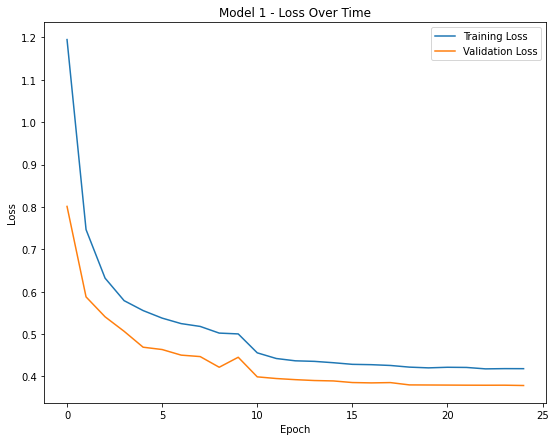

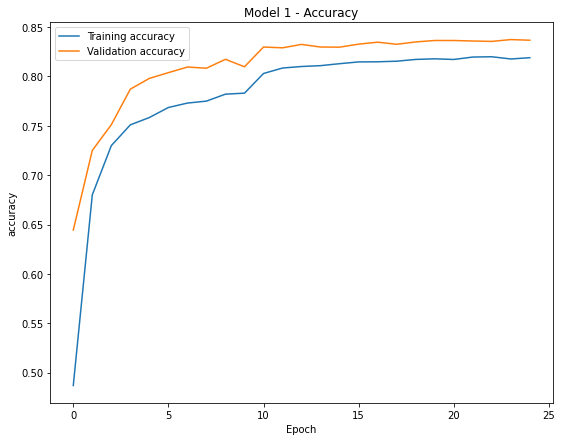

In [23]:
PLOT(history_1,1)


In [24]:

# MODEL REPLICA NO.2
X_train_2 = X_train[37732:75465]
y_train_2 = y_train[37732:75465]

In [25]:
X_train_2, y_train_2 = PREPROCESS(X_train_2,y_train_2)

In [26]:

model_2 = CREATE_MODEL(X_train_2.shape[1])
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               2560      
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)               

In [27]:
model_2 = COMPILE(model_2)
history_2,model_2 = FIT(model_2,X_train_2,y_train_2,2);

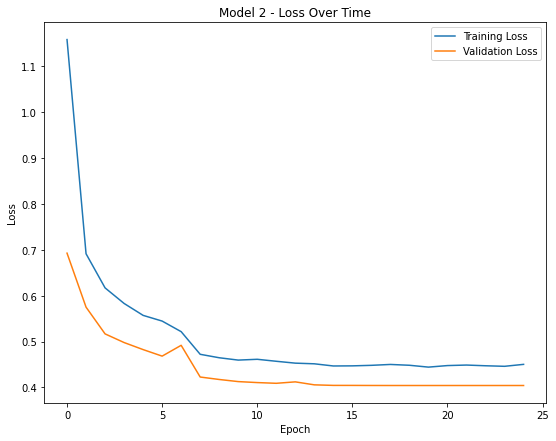

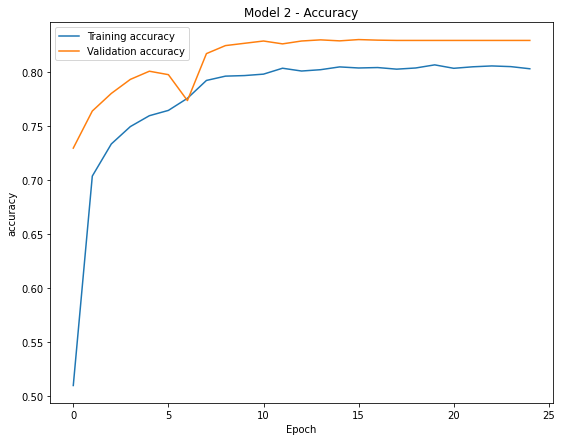

In [28]:
PLOT(history_2,2);

In [29]:
# MODEL REPLICA NO.3
X_train_3 = X_train[75465:-113197]
y_train_3 = y_train[75465:-113197]

In [30]:
X_train_3, y_train_3 = PREPROCESS(X_train_3,y_train_3)

In [31]:
model_3 = CREATE_MODEL(X_train_3.shape[1])
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 256)               2560      
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 32)               

In [32]:
model_3 = COMPILE(model_3);
history_3, model_3 = FIT(model_3,X_train_3,y_train_3,3)

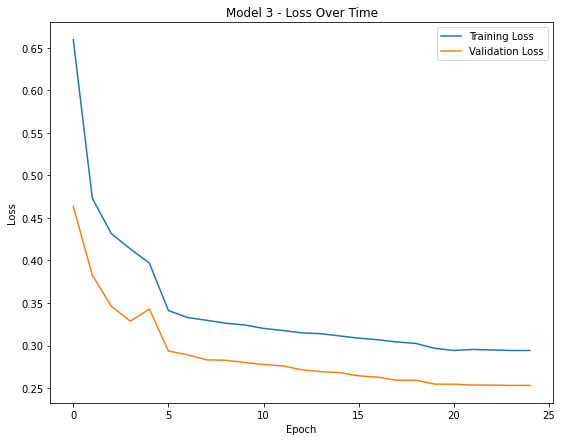

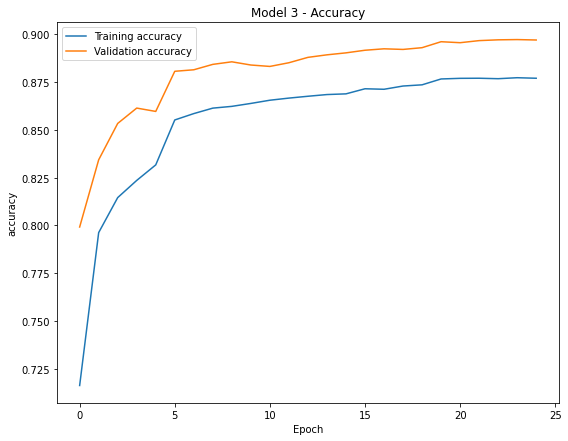

In [33]:
PLOT(history_3,3)


In [37]:
# MODEL REPLICA NO.4
X_train_4 = X_train[113197:150930]
y_train_4 = y_train[113197:150930]

In [35]:
X_train_4, y_train_4 = PREPROCESS(X_train_4,y_train_4)

In [36]:
model_4 = CREATE_MODEL(X_train_4.shape[1])
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 256)               2560      
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_11 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 32)               

In [38]:
model_4 = COMPILE(model_4);
history_4, model_4 = FIT(model_4,X_train_4,y_train_4,4)

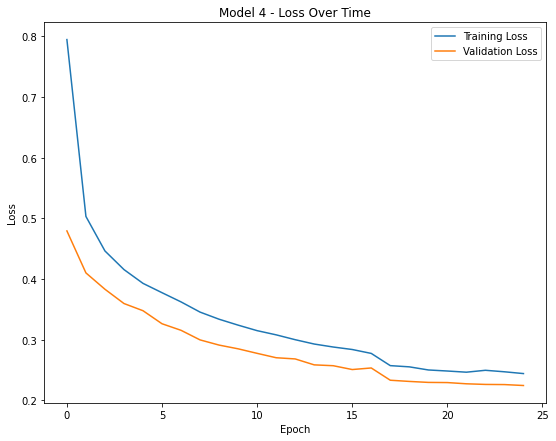

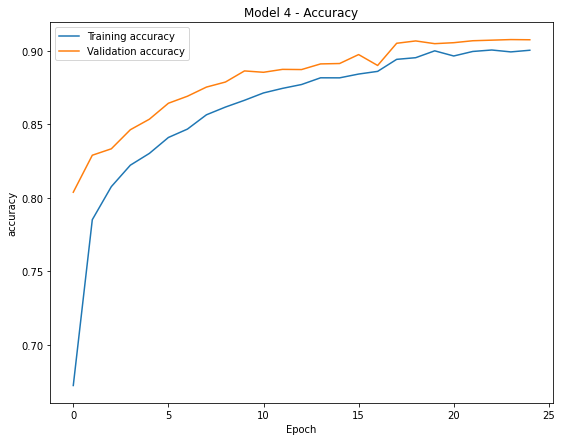

In [39]:
PLOT(history_4,4)

In [40]:
# MODEL REPLICA NO.5
X_train_5 = X_train[150930:188662]
y_train_5 = y_train[150930:188662]

In [41]:
X_train_5, y_train_5 = PREPROCESS(X_train_5,y_train_5)

In [42]:
model_5 = CREATE_MODEL(X_train_5.shape[1])
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 256)               2560      
_________________________________________________________________
dropout_12 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_13 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_14 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 32)               

In [43]:
model_5 = COMPILE(model_5);
history_5, model_5 = FIT(model_5,X_train_5,y_train_5,5)

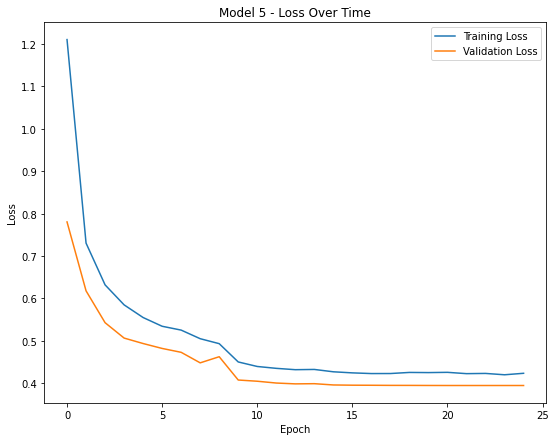

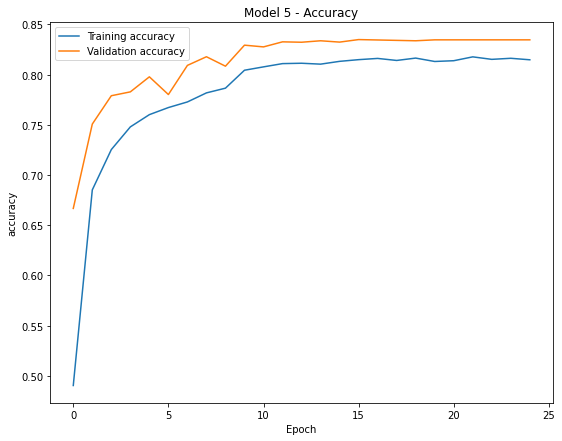

In [44]:
PLOT(history_5,5)

In [45]:
# MODEL REPLICA NO.6
X_train_6 = X_train[188662:226395]
y_train_6 = y_train[188662:226395]

In [47]:
X_train_6, y_train_6 = PREPROCESS(X_train_6,y_train_6)

In [48]:
model_6 = CREATE_MODEL(X_train_6.shape[1])
model_6.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 256)               2560      
_________________________________________________________________
dropout_15 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_16 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_17 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 32)               

In [49]:
model_6 = COMPILE(model_6);
history_6, model_6 = FIT(model_6,X_train_6,y_train_6,6)

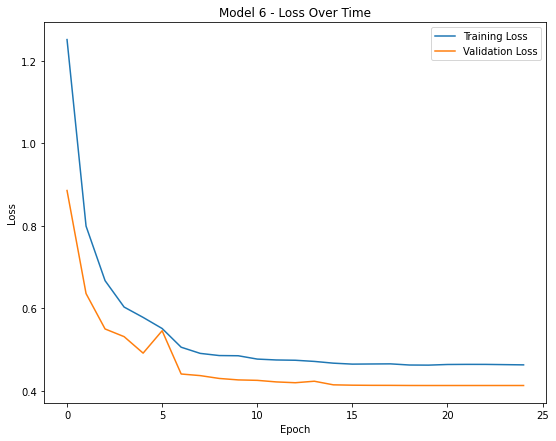

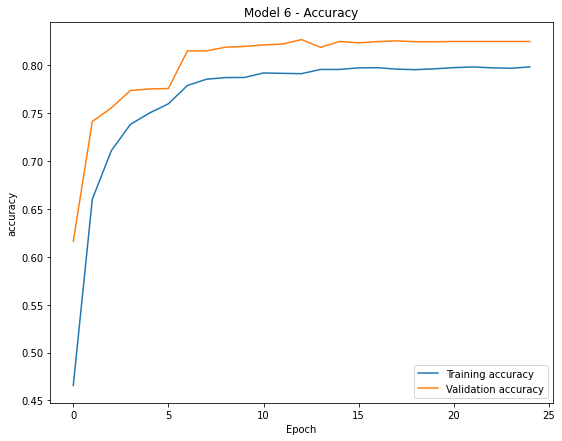

In [50]:
PLOT(history_6,6)

In [51]:
# MODEL REPLICA NO.7
X_train_7 = X_train[226395:264127]
y_train_7 = y_train[226395:264127]

In [52]:
X_train_7, y_train_7 = PREPROCESS(X_train_7,y_train_7)

In [53]:
model_7 = CREATE_MODEL(X_train_7.shape[1])
model_7.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 256)               2560      
_________________________________________________________________
dropout_18 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_19 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_20 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 32)               

In [54]:
model_7 = COMPILE(model_7);
history_7, model_7 = FIT(model_7,X_train_7,y_train_7,7)

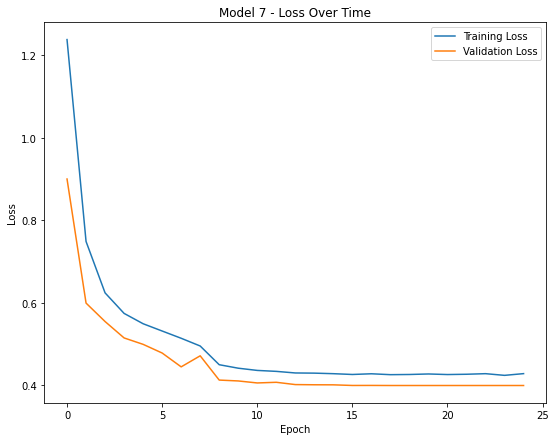

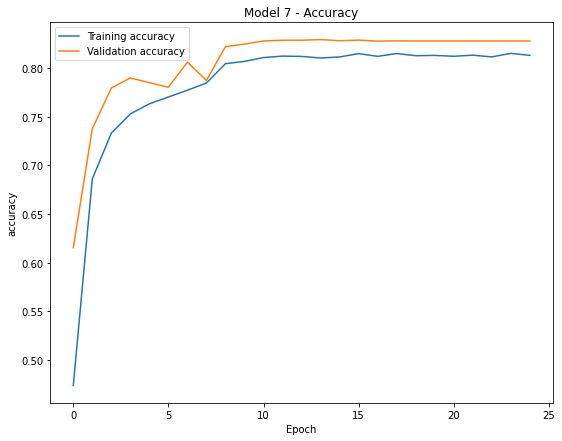

In [55]:
PLOT(history_7,7)

In [56]:
# MODEL REPLICA NO.8
X_train_8 = X_train[264127:301860]
y_train_8 = y_train[264127:301860]

In [57]:
X_train_8, y_train_8 = PREPROCESS(X_train_8,y_train_8)

In [58]:
model_8 = CREATE_MODEL(X_train_8.shape[1])
model_8.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 256)               2560      
_________________________________________________________________
dropout_21 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_22 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_23 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 32)               

In [59]:
model_8 = COMPILE(model_8);
history_8, model_8 = FIT(model_8,X_train_8,y_train_8,8)

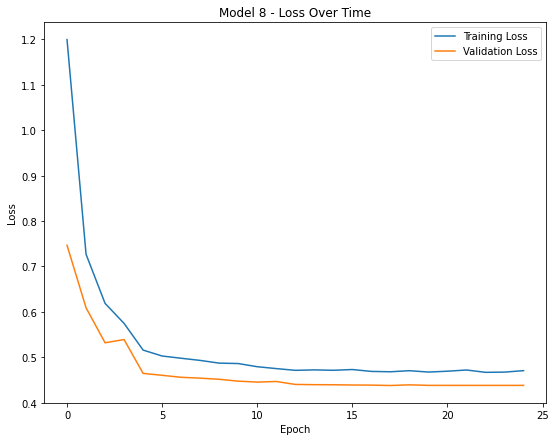

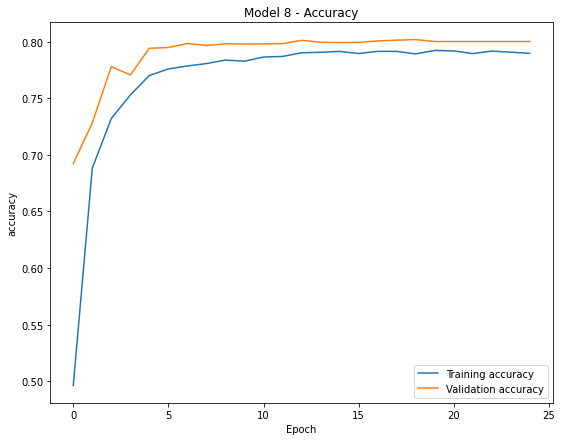

In [60]:
PLOT(history_8,8)

In [61]:
# MODEL REPLICA NO.9
X_train_9 = X_train[301860:339592]
y_train_9 = y_train[301860:339592]

In [62]:
X_train_9, y_train_9 = PREPROCESS(X_train_9,y_train_9)

In [63]:
model_9 = CREATE_MODEL(X_train_9.shape[1])
model_9.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 256)               2560      
_________________________________________________________________
dropout_24 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_25 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_26 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_43 (Dense)             (None, 32)               

In [64]:
model_9 = COMPILE(model_9);
history_9, model_9 = FIT(model_9,X_train_9,y_train_9,9)

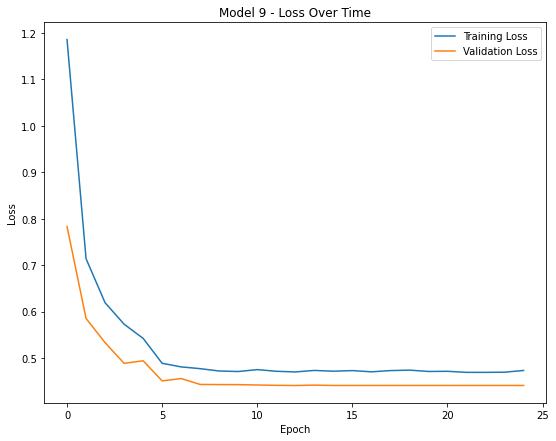

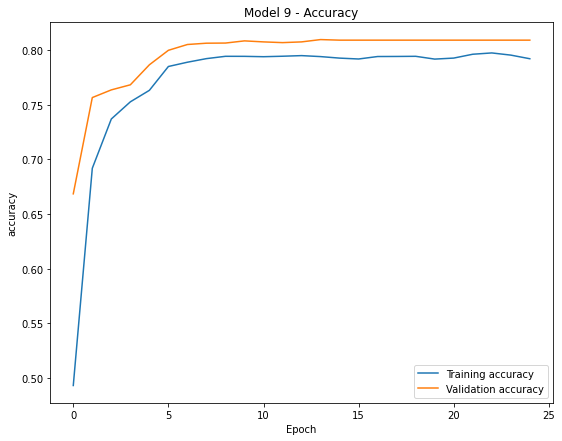

In [65]:
PLOT(history_9,9)

In [66]:
# MODEL REPLICA NO.10
X_train_10 = X_train[339592:377325]
y_train_10 = y_train[339592:377325]

In [67]:
X_train_10, y_train_10 = PREPROCESS(X_train_10,y_train_10)

In [68]:
model_10 = CREATE_MODEL(X_train_10.shape[1])
model_10.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 256)               2560      
_________________________________________________________________
dropout_27 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_28 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_29 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_48 (Dense)             (None, 32)               

In [69]:
model_10 = COMPILE(model_10);
history_10, model_10 = FIT(model_10,X_train_10,y_train_10,10)

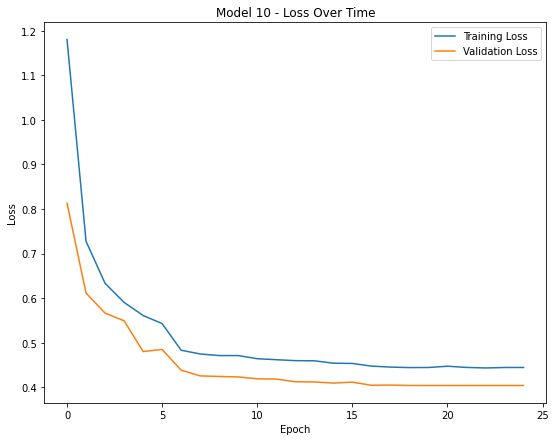

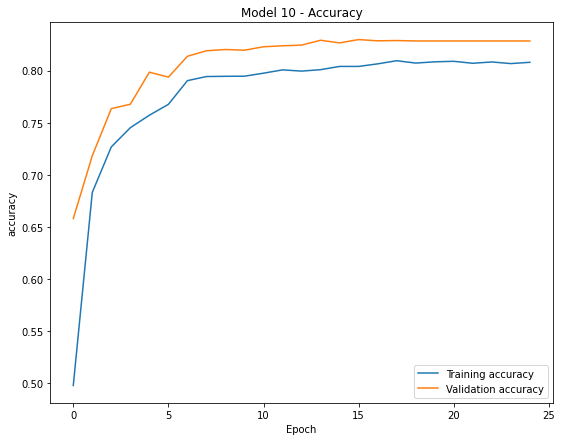

In [70]:
PLOT(history_10,10)

In [71]:
# MODEL REPLICA NO.11
X_train_11 = X_train[377325:415058]
y_train_11 = y_train[377325:415058]

In [72]:
X_train_11, y_train_11 = PREPROCESS(X_train_11,y_train_11)

In [73]:
model_11 = CREATE_MODEL(X_train_11.shape[1])
model_11.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 256)               2560      
_________________________________________________________________
dropout_30 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_31 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_52 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_32 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_53 (Dense)             (None, 32)              

In [74]:
model_11 = COMPILE(model_11);
history_11, model_11 = FIT(model_11,X_train_11,y_train_11,11)

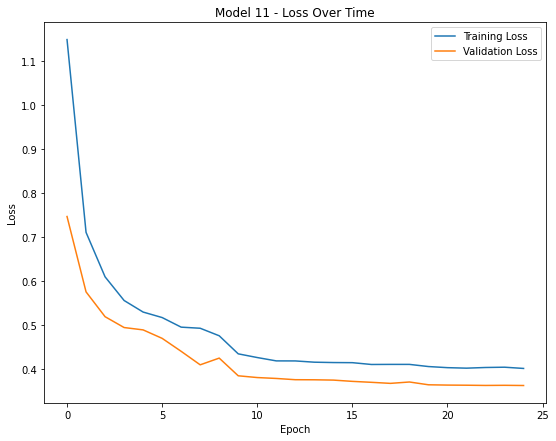

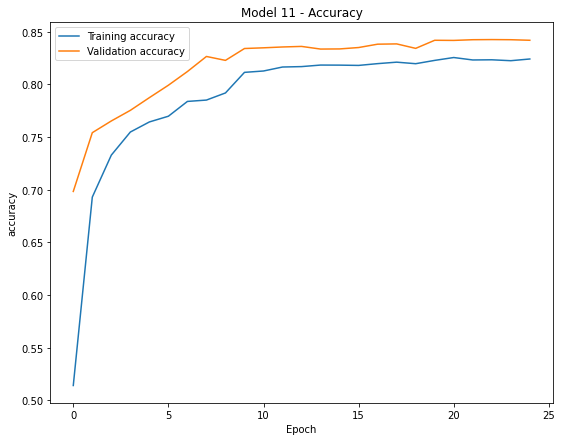

In [75]:
PLOT(history_11,11)

In [76]:
# MODEL REPLICA NO.12
X_train_12 = X_train[415058:452790]
y_train_12 = y_train[415058:452790]

In [77]:
X_train_12, y_train_12 = PREPROCESS(X_train_12,y_train_12)

In [78]:
model_12 = CREATE_MODEL(X_train_12.shape[1])
model_12.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 256)               2560      
_________________________________________________________________
dropout_33 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_56 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_34 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_57 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_35 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_58 (Dense)             (None, 32)              

In [79]:
model_12 = COMPILE(model_12);
history_12, model_12 = FIT(model_12,X_train_12,y_train_12,12)

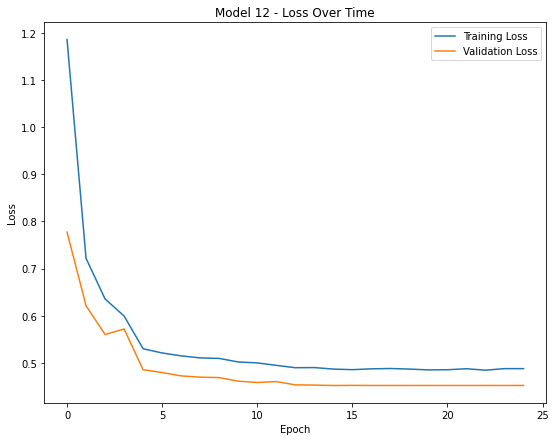

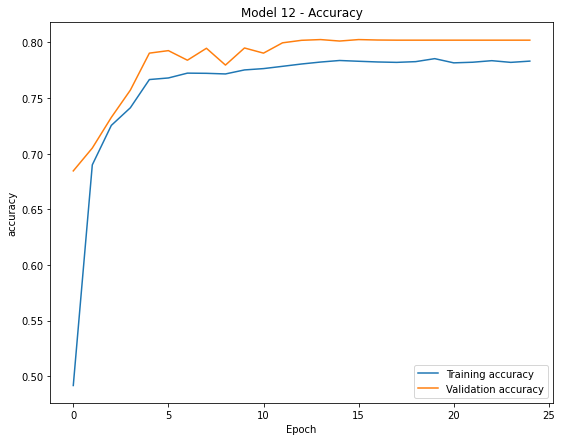

In [80]:
PLOT(history_12,12)

In [81]:
# MODEL REPLICA NO.13
X_train_13 = X_train[452790:490523]
y_train_13 = y_train[452790:490523]

In [82]:
X_train_13, y_train_13 = PREPROCESS(X_train_13,y_train_13)

In [83]:
model_13 = CREATE_MODEL(X_train_13.shape[1])
model_13.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 256)               2560      
_________________________________________________________________
dropout_36 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_61 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_37 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_62 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_38 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_63 (Dense)             (None, 32)              

In [84]:
model_13 = COMPILE(model_13);
history_13, model_13 = FIT(model_13,X_train_13,y_train_13,13)

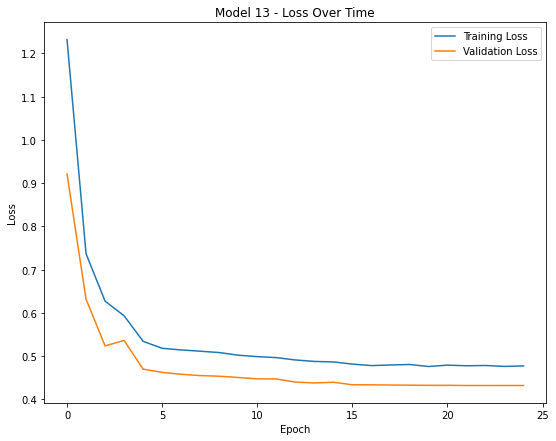

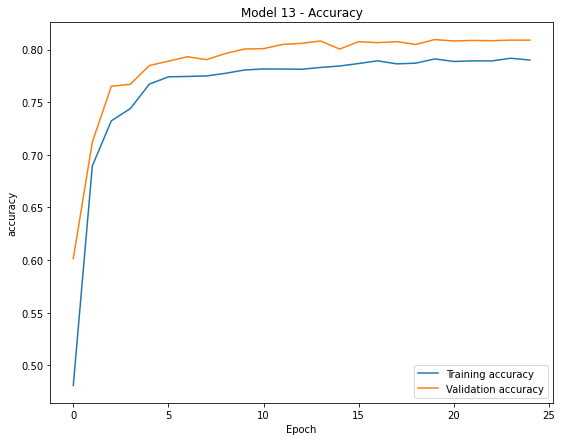

In [85]:
PLOT(history_13,13)

In [86]:
# MODEL REPLICA NO.14
X_train_14 = X_train[490523:-1]
y_train_14 = y_train[490523:-1]

In [87]:
X_train_14, y_train_14 = PREPROCESS(X_train_14,y_train_14)

In [88]:
model_14 = CREATE_MODEL(X_train_14.shape[1])
model_14.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 256)               2560      
_________________________________________________________________
dropout_39 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_66 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_40 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_67 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_41 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_68 (Dense)             (None, 32)              

In [89]:
model_14 = COMPILE(model_14);
history_14, model_14 = FIT(model_14,X_train_14,y_train_14,14)

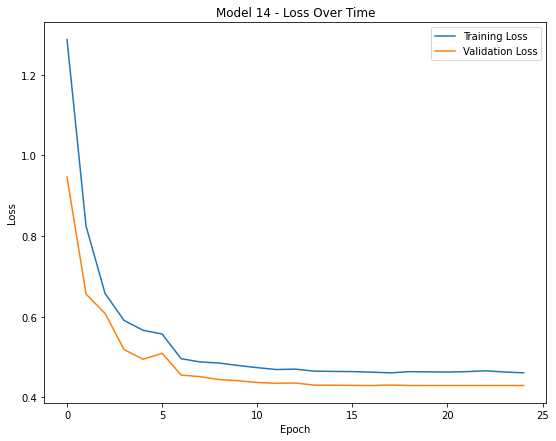

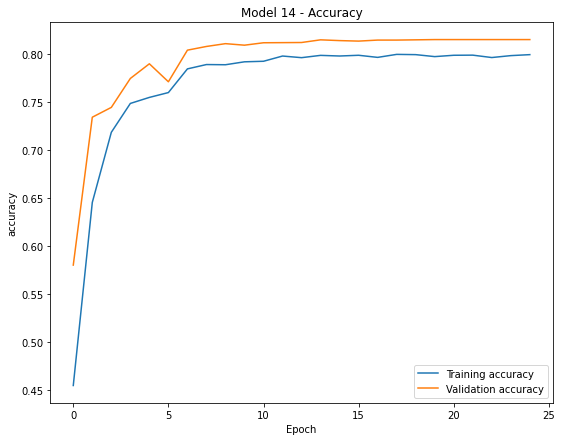

In [90]:
PLOT(history_14,14)

The global model¶
**bold text**

In [91]:
X_test, y_test = PREPROCESS(X_test, y_test)


In [92]:
model_g = CREATE_MODEL(X_test.shape[1])
model_g.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_70 (Dense)             (None, 256)               2560      
_________________________________________________________________
dropout_42 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_71 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_43 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_72 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_44 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_73 (Dense)             (None, 32)              

In [93]:
all_models = []
LOAD_MODELS()

In [98]:
weights = [max(history_1.history['accuracy']), max(history_2.history['accuracy']), max(history_3.history['accuracy']), max(history_4.history['accuracy']),max(history_5.history['accuracy']),max(history_6.history['accuracy']),max(history_7.history['accuracy']),max(history_8.history['accuracy']),max(history_9.history['accuracy']),max(history_10.history['accuracy']),max(history_11.history['accuracy']),max(history_12.history['accuracy']),max(history_13.history['accuracy']),max(history_14.history['accuracy'])]
x = max(weights)
idx = weights.index(x)
weights[idx] = 1
x = min(weights)
idx = weights.index(x)
weights[idx] = 0.02
for i in range(14):
    if(weights[i] != 1 and weights[i] != 0.02):
        weights[i] = 0.14
        break
avg_model_weights = APPLY_WEIGHT_FUNCTION(weights)


ValueError: ignored

In [100]:
model_g.set_weights(avg_model_weights)
model_g = COMPILE(model_g)
_ , accuracy = model_g.evaluate(X_test,y_test,verbose=0)
print(f"Global Model Accuracy: {round(accuracy*100,2)}%")

Global Model Accuracy: 49.8%
